In [453]:
'''
Machine Learning Pipeline for Housing Price Prediction

This script loads housing data, 
preprocesses features, traind linear 
and polynomial regression models, and 
evaluates their performance. the code 
follows best practices for readability and maintainability.
'''

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Data Loading and Inspection

In [454]:
# Load dataset
df = pd.read_csv('Housing.csv')
print('Initial datset preview:')
df.head()

Initial datset preview:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [455]:
# Display basic statictics
print("Dataset Statistics:")
df.describe()

Dataset Statistics:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [456]:
# Check data types
print("data types:")
df.dtypes

data types:


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Data Preprocessing

In [457]:
# Define categorical mappings in a centralized dictionary
CATEGORICAL_MAPPING = {
    # Binary features
    'binary_columns': [
        'mainroad','guestroom', 'basement', 
        'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'
    ],
    'binary_mapping': {'yes':1, 'no':0},

    # Ordinal feature (inherent order)
    'furnishingstatus': {
        'furnished':2,
        'semi-furnished':1, 
        'unfurnished':0
        }
}

# Convert binary features using pandas factorize (auto_detect categories)
for col in CATEGORICAL_MAPPING['binary_columns']:
    df[col] = df[col].replace(CATEGORICAL_MAPPING['binary_mapping'])

# Convert furnishing status using explicit mapping
df['furnishingstatus'] = df['furnishingstatus'].map(CATEGORICAL_MAPPING['furnishingstatus']).astype('int8')

/var/folders/h7/k41ml98x2vzclpq5z9m3ptb00000gn/T/ipykernel_2810/2643194554.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(CATEGORICAL_MAPPING['binary_mapping'])


In [458]:
# Standardize features
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
Scaler = StandardScaler()
df[columns] = Scaler.fit_transform(df[columns])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286


Data Visualization

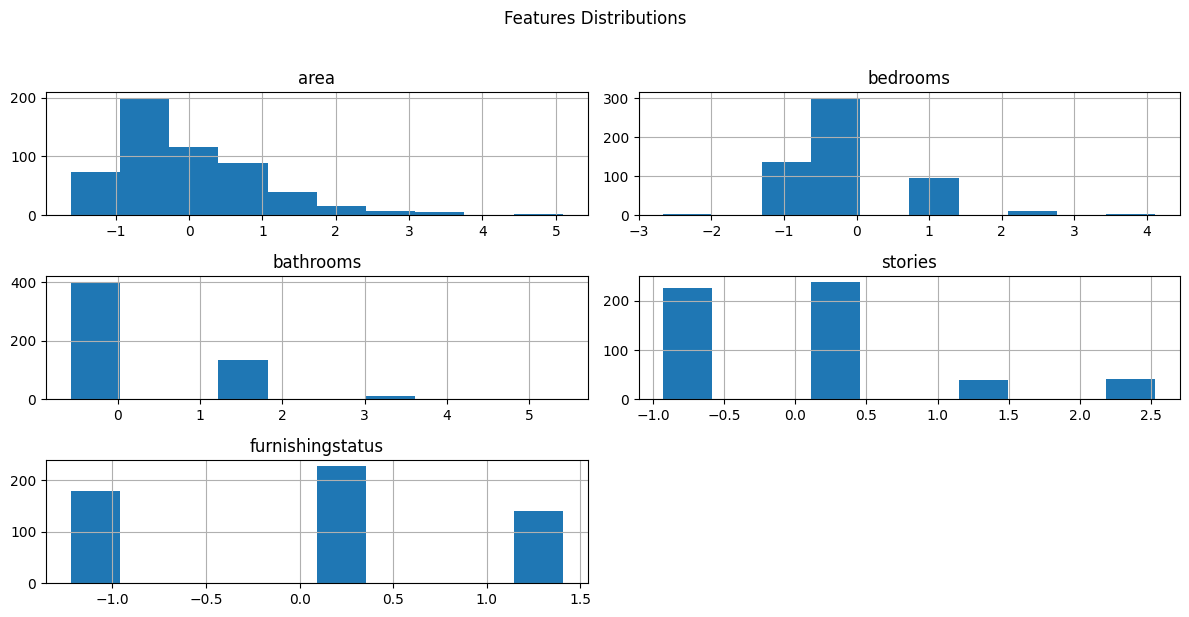

In [459]:
# Histogram of key features
hist_features = df[['area', 'bedrooms', 'bathrooms', 'stories', 'furnishingstatus']]
hist_features.hist(figsize=(12, 6))
plt.suptitle('Features Distributions', y=1.02)
plt.tight_layout()
plt.show()

/Users/sara/Library/Python/3.9/lib/python/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(close=None, block=None)>

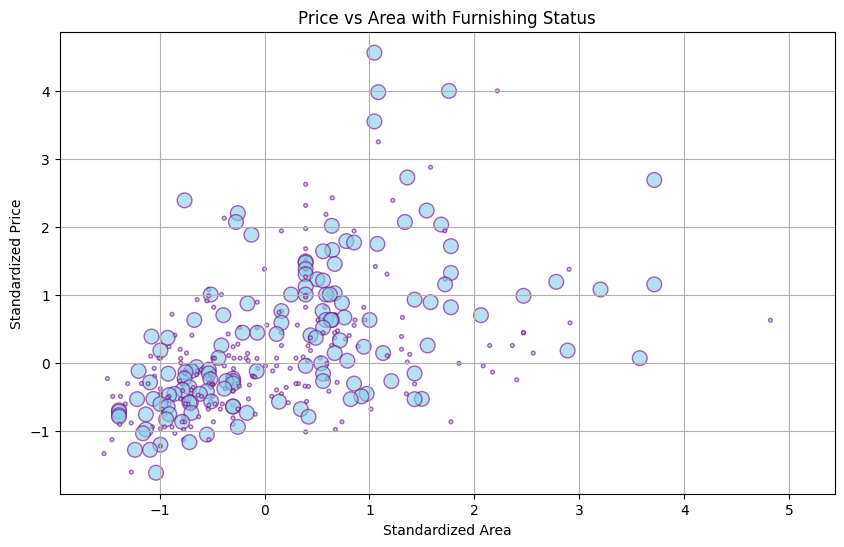

In [460]:
"""
Scatter Plot Analysis: Price vs Area with Furnishing Status

- Positive correlation: Larger areas generally correspond to higher prices.
- Furnishing status (point size) shows better-furnished homes tend to have higher prices.
- Outliers present: Some houses deviate from the trend, warranting further investigation.
"""

# Scatter plot : Area  vs Price
plt.figure(figsize=(10, 6))
sizes = df.furnishingstatus*80 # Size based on furnishing status
plt.scatter(df.area, df.price, 
            s=sizes, alpha=0.6, 
            color='skyblue', 
            edgecolors='purple')
plt.title('Price vs Area with Furnishing Status')
plt.xlabel('Standardized Area')
plt.ylabel('Standardized Price')
plt.grid(True)
plt.show

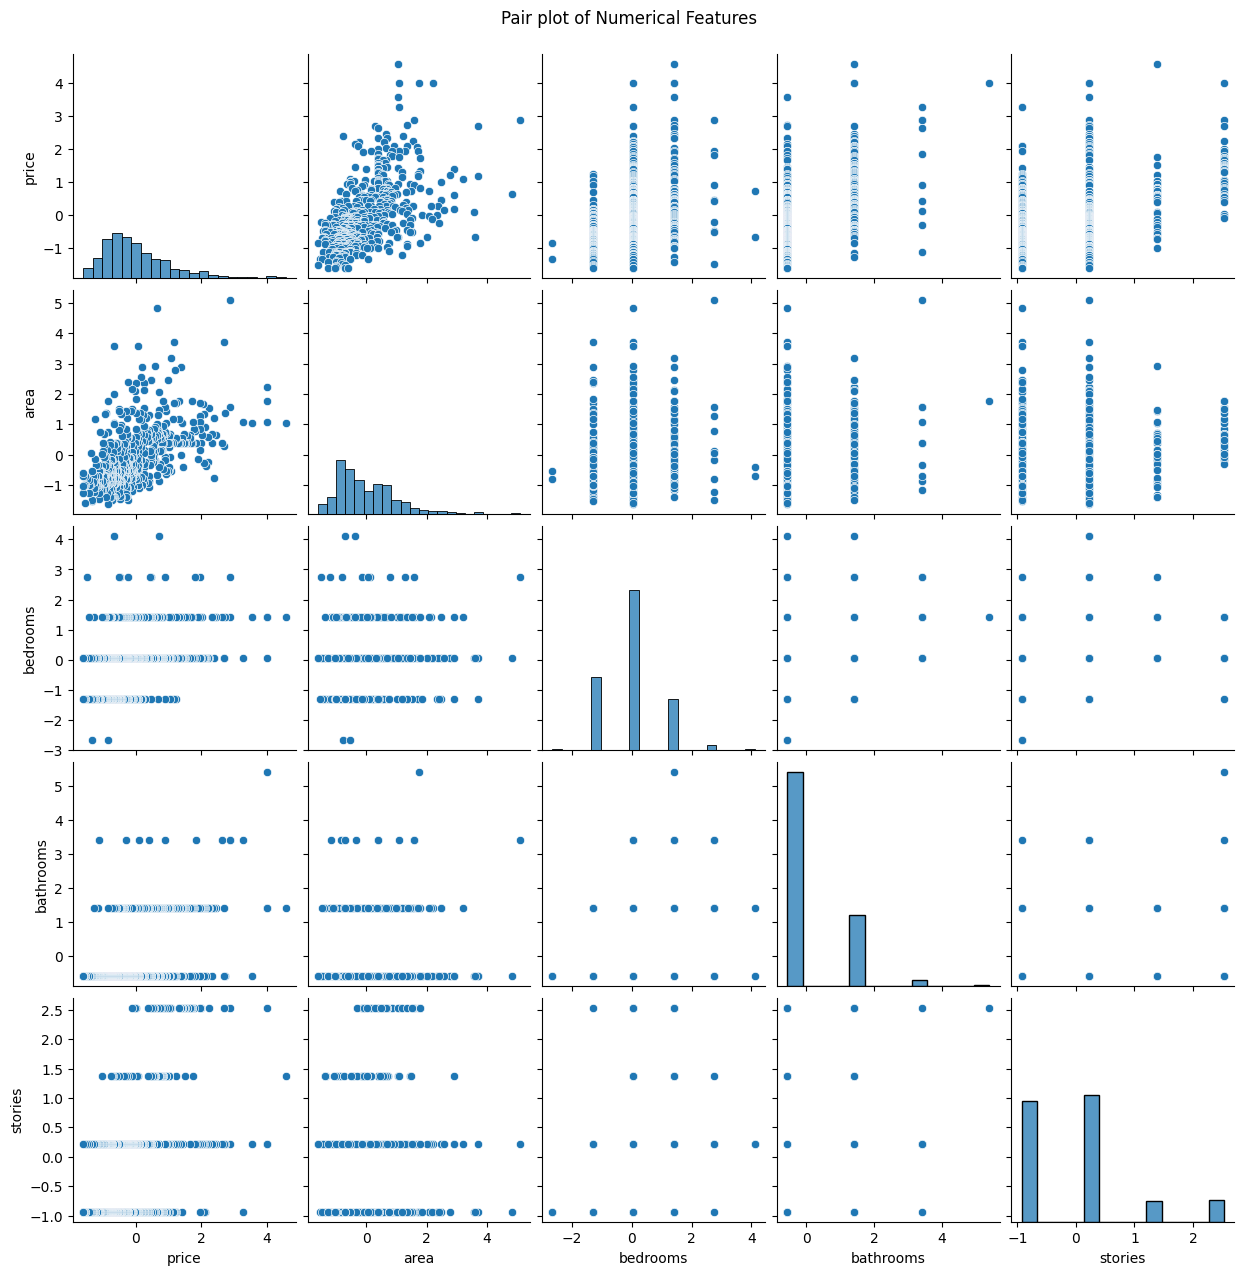

<Figure size 800x600 with 0 Axes>

In [461]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])
plt.suptitle('Pair plot of Numerical Features', y=1.02)
plt.figure(figsize=(8, 6))
plt.show()

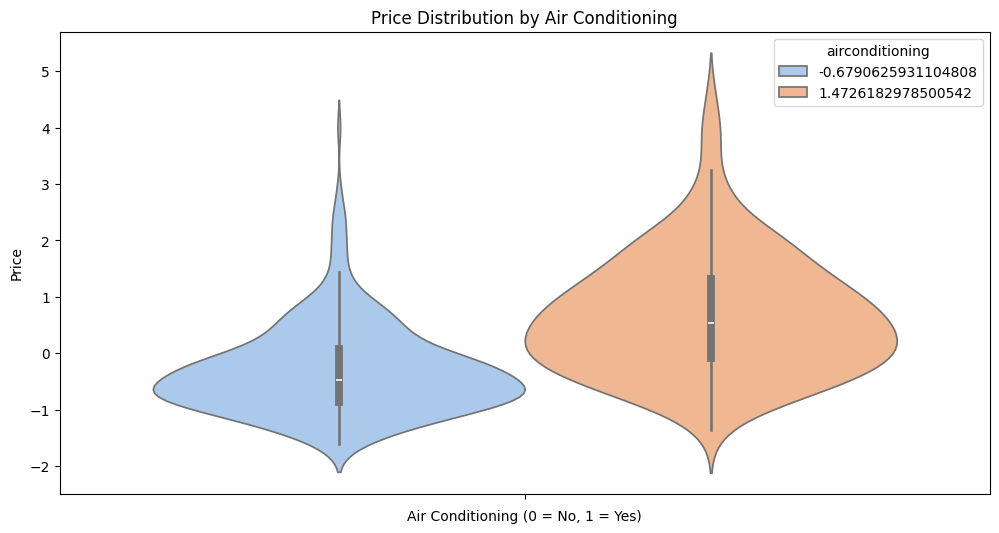

In [462]:
"""
Violin Plot Analysis: Price Distribution by Air Conditioning

- Houses with air conditioning (1) have higher median prices and greater price variability than those without (0).
- Prices for houses without air conditioning are more concentrated at lower values, with some high-priced outliers.
- Air conditioning significantly influences price; consider including it as a feature in the model.
"""

plt.figure(figsize=(12, 6))
sns.violinplot(hue='airconditioning', y='price', data=df, palette='pastel')
plt.title('Price Distribution by Air Conditioning')
plt.xlabel('Air Conditioning (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

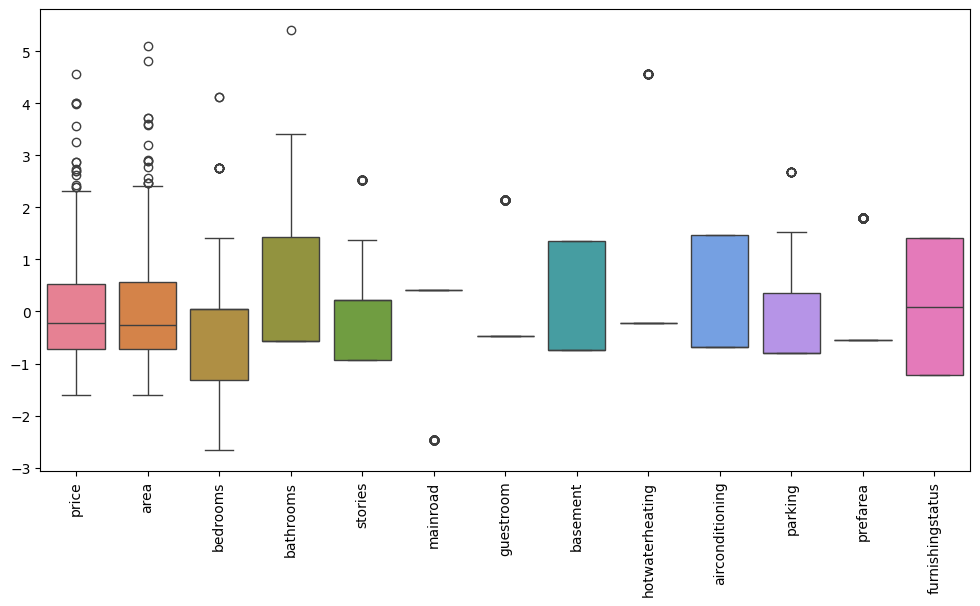

In [463]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show

Model Training

In [464]:
# Prepare features and target
features = ['area', 'bathrooms', 'stories','basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']
X = df[features].values
y = df['price'].values

In [465]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 , random_state=2)
print(f"Train shape: {X_train.shape, y_train.shape}")
print(f"Test shape: {X_test.shape, y_test.shape}")

Train shape: ((490, 8), (490,))
Test shape: ((55, 8), (55,))


In [466]:
# Standardize features
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
Scaler = StandardScaler()
df[columns] = Scaler.fit_transform(df[columns])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286


Linear Regression Model

In [467]:
# Initialize and train model
Mlinear_regr_Xtrain = X_train[:, :8]
Mlinear_regr_Ytrain = y_train.reshape(-1, 1)

Linear_reg = LinearRegression()
Linear_reg.fit(Mlinear_regr_Xtrain, Mlinear_regr_Ytrain)

# Model coefficients
print("Linear Regressiob Results:")
print("coefficients:", Linear_reg.coef_)
print("intercept", Linear_reg.intercept_)

Linear Regressiob Results:
coefficients: [[0.32834644 0.27306045 0.24621015 0.13676241 0.10167143 0.2201638
  0.13977693 0.17336635]]
intercept [-0.00041239]


In [468]:
# Make Predictions and evaluate
Mlinear_regr_Ytest_ = Linear_reg.predict(X_test[:, :8])
Mlinear_regr_Xtest = X_test[:, :8]
Mlinear_regr_Ytest = y_test.reshape(-1, 1)

print("Linear Regressiob Evaluation:")
print("Residual sum of squares: %.2f" %np.mean(Mlinear_regr_Ytest - Mlinear_regr_Ytest_) ** 2)
print('Variance score: %.2f' %  Linear_reg.score(Mlinear_regr_Xtest, Mlinear_regr_Ytest))

Linear Regressiob Evaluation:
Residual sum of squares: 0.00
Variance score: 0.69


Polynomial Regression Model

In [469]:
# Create polynomial regression pipeline
degree = 2
poly_model = make_pipeline(
    PolynomialFeatures(degree),
    StandardScaler(),
    LinearRegression()
)

poly_model.fit(X_train, y_train)
y_test_pred = poly_model.predict(X_test[:, :8])
y_test = y_test

rss = np.mean(y_test - y_test_pred) ** 2
r2 = r2_score(y_test, y_test_pred)

print("Polynomial Regression Evaluation:")
print("Residual sum of squares: %.2f" % rss)
print('Variance score: %.2f' % r2)

Polynomial Regression Evaluation:
Residual sum of squares: 0.00
Variance score: 0.73
